# Praktikum 9: Explizite Mehrstufige Runge-Kutta Verfahren


In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Definition der verschiedenen Verfahren

In [8]:
def RK_explizit(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k = f(x[i-1], y[i-1])
        y[i] = y[i-1] + h*k

    return x, y

# Verfahren von Runge (RK2)
def runge_explizit(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + h*0.5, y[i-1] + h*0.5*k1)
        y[i] = y[i-1] + h*k2

    return x, y

# Verfahren von Heun (RK2)
def heun_explizit(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + h, y[i-1] + h*k1)
        y[i] = y[i-1] + h*(0.5*k1 + 0.5*k2)

    return x, y

# Verfahren Runge-Kutta-Verfahren (RK4)
def runga_kutta_RK4(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        y[i] = y[i-1] + h*((1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4)

    return x, y

### Modelfunktionen und Plots

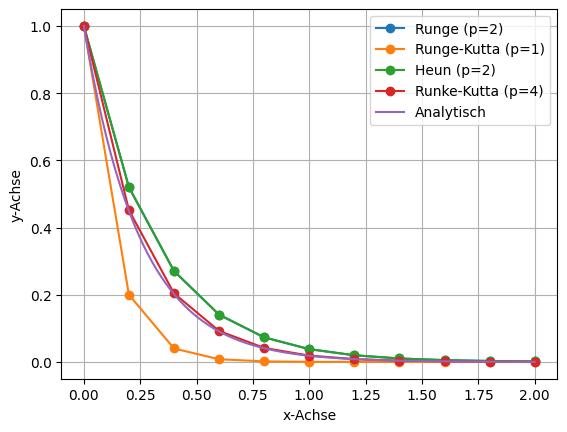

In [9]:
def model1(x, y):
    return -4 * y

def model_analytisch(x):
    return np.exp(-4 * x)

x_an = np.linspace(0,2,100)

x0 = [0, 1] # Startwert x, y
R_RK2_x, R_RK2_y = runge_explizit(x0, 2, 10, model1)
RK_RK1_x, RK_RK1_y = RK_explizit(x0, 2, 10, model1)
H_RK1_x, H_RK1_y = heun_explizit(x0, 2, 10, model1)
RK_RK4_x, RK_RK4_y = runga_kutta_RK4(x0, 2, 10, model1)

plt.plot(R_RK2_x, R_RK2_y, 'o-', label='Runge (p=2)')
plt.plot(RK_RK1_x, RK_RK1_y, 'o-', label='Runge-Kutta (p=1)')
plt.plot(H_RK1_x, H_RK1_y, 'o-', label='Heun (p=2)')
plt.plot(RK_RK4_x, RK_RK4_y, 'o-', label='Runke-Kutta (p=4)')
plt.plot(x_an, model_analytisch(x_an), '-', label='Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

### Test an Differentialgleichung

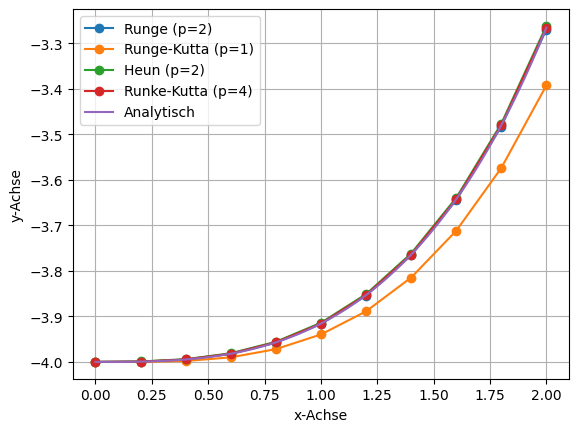

In [10]:
def model2(x, y):
    return -x**2 / y

def model2_analytisch(x):
    return -np.sqrt(2/3) * np.sqrt(24 - x**3)

x_an = np.linspace(0,2,100)

x0 = [0, -4] # Startwert x, y
R_RK2_x, R_RK2_y = runge_explizit(x0, 2, 10, model2)
RK_RK1_x, RK_RK1_y = RK_explizit(x0, 2, 10, model2)
H_RK1_x, H_RK1_y = heun_explizit(x0, 2, 10, model2)
RK_RK4_x, RK_RK4_y = runga_kutta_RK4(x0, 2, 10, model2)

plt.plot(R_RK2_x, R_RK2_y, 'o-', label='Runge (p=2)')
plt.plot(RK_RK1_x, RK_RK1_y, 'o-', label='Runge-Kutta (p=1)')
plt.plot(H_RK1_x, H_RK1_y, 'o-', label='Heun (p=2)')
plt.plot(RK_RK4_x, RK_RK4_y, 'o-', label='Runke-Kutta (p=4)')
plt.plot(x_an, model2_analytisch(x_an), '-', label='Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

### Aufgabe 6: Berechnung des Fehlers

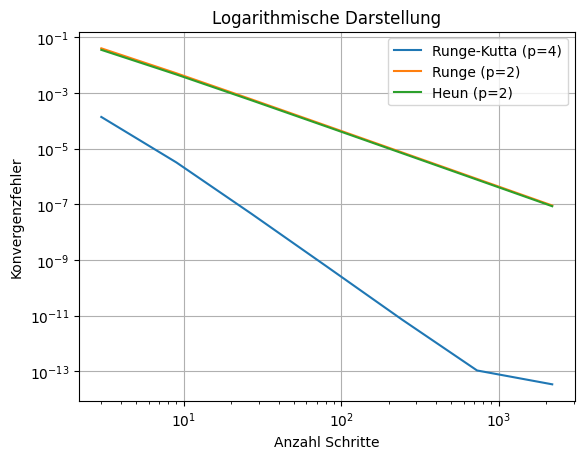

In [11]:
n_vec = list(range(1, 8))  # Vektor [1,2,...,100]
n_vec_3 = []

# Schleife durch jedes Element und erhebe es zum Kubik
for e in n_vec:
    kubik =  3 ** e
    n_vec_3.append(kubik)
#print(n_vec_3)

err_Runge_kutta = []
err_Runge = []
err_Heun = []
for n in n_vec_3:
    #print("Schritt:" ,n)
    x0 = (0, -4)
    x, y = runga_kutta_RK4(x0, 2, n, model2)
    err_Runge_kutta.append(np.linalg.norm(y-model2_analytisch(x),np.inf)) 
    x, y = runge_explizit(x0, 2, n, model2)
    err_Runge.append(np.linalg.norm(y-model2_analytisch(x),np.inf))
    x, y = heun_explizit(x0, 2, n, model2)
    err_Heun.append(np.linalg.norm(y-model2_analytisch(x),np.inf))

err_steps = True
if(err_steps == True):
    plt.figure(2)
    #plt.subplot(221)
    plt.loglog(n_vec_3,err_Runge_kutta,'-', label='Runge-Kutta (p=4)')
    plt.loglog(n_vec_3,err_Runge,'-', label = 'Runge (p=2)')
    plt.loglog(n_vec_3,err_Heun,'-', label = 'Heun (p=2)')
    plt.xlabel('Anzahl Schritte')
    plt.ylabel('Konvergenzfehler')
    plt.title('Logarithmische Darstellung')
    plt.legend()
    plt.grid()
    plt.show()


# Löse Differentialgleichung mit RK4

[ 1.00000000e+00 -1.17948152e+02 -1.36087196e+34             inf
             inf             inf]


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_19956\1660560196.py:2: RuntimeWarning: overflow encountered in scalar power
  return 3*x*y**2+5


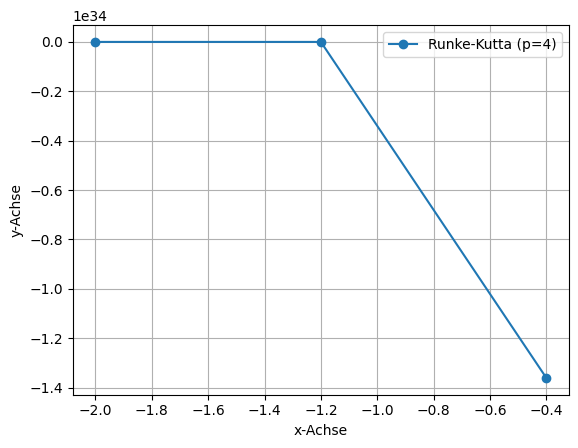

In [12]:
def model2(x, y):
    return 3*x*y**2+5

def model2_analytisch(x):
    return -np.sqrt(2/3) * np.sqrt(24 - x**3)

x_an = np.linspace(0,50,100)

x0 = [-2, 1] # Startwert x, y
#R_RK2_x, R_RK2_y = runge_explizit(x0, 2, 10, model2)
#RK_RK1_x, RK_RK1_y = RK_explizit(x0, 2, 10, model2)
#H_RK1_x, H_RK1_y = heun_explizit(x0, 2, 10, model2)
RK_RK4_x, RK_RK4_y = runga_kutta_RK4(x0, 2, 5, model2)

#plt.plot(R_RK2_x, R_RK2_y, 'o-', label='Runge (p=2)')
#plt.plot(RK_RK1_x, RK_RK1_y, 'o-', label='Runge-Kutta (p=1)')
#plt.plot(H_RK1_x, H_RK1_y, 'o-', label='Heun (p=2)')

print(RK_RK4_y)
plt.plot(RK_RK4_x, RK_RK4_y, 'o-', label='Runke-Kutta (p=4)')
#plt.plot(x_an, model2_analytisch(x_an), '-', label='Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

# Übung 14 5a / 5b

Zweite Funktion folgendem Butcher Tableau
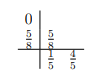

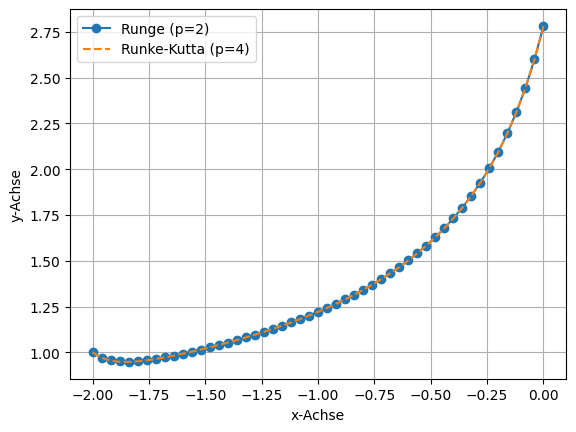

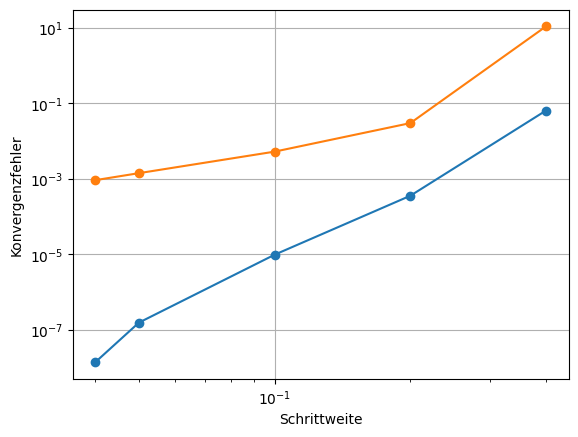

In [13]:
def model2(x, y):
    return 5+3*x*y**2

def model2_analytisch(x):
    return 0


def runga_kutta_RK4(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        y[i] = y[i-1] + h*((1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4)

    return x, y


def runga_kutta_RK2(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + (5/8)*h, y[i-1] + (5/8)*h*k1)
        k3 = f(x[i-1] + 0.5*h, y[i-1] + 0.5*h*k2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        y[i] = y[i-1] + h*((1/5)*k1 + (4/5)*k2 + 0*k3 + 0*k4)
    return x, y

X=0

i = np.array([5,10,20,40,50])
glob_errRK4 = []
glob_errRK2 = []
h =[]
k=0
for j in i:
    x_an = np.linspace(0,2,100)

    x0 = [-2, 1] # Startwert x, y
    RK_RK2_x, RK_RK2_y = runga_kutta_RK2(x0, X, j, model2)
    #RK_RK1_x, RK_RK1_y = RK_explizit(x0, X, j, model2)
    #H_RK1_x, H_RK1_y = heun_explizit(x0, X, j, model2)    
    RK_RK4_x, RK_RK4_y = runga_kutta_RK4(x0, X, j, model2)

    glob_errRK4.append(np.abs((RK_RK4_y[len(RK_RK4_y)-1]-2.7810285)))
    glob_errRK2.append(np.abs((RK_RK2_y[len(RK_RK2_y)-1]-2.7810285)))
    h.append((X-x0[0])/i[k])
    k+=1



plt.plot(RK_RK2_x, RK_RK2_y, 'o-', label='Runge (p=2)')
#plt.plot(RK_RK1_x, RK_RK1_y, 'o-', label='Runge-Kutta (p=1)')
#plt.plot(H_RK1_x, H_RK1_y, 'o-', label='Heun (p=2)')
plt.plot(RK_RK4_x, RK_RK4_y, '--', label='Runke-Kutta (p=4)')
#plt.plot(x_an, model_analytisch(x_an), '-', label='Analytisch')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()


plt.loglog(h,glob_errRK4,'o-',h,glob_errRK2,'o-')
plt.xlabel('Schrittweite')
plt.ylabel('Konvergenzfehler')
plt.grid(True)
plt.show()

SEP 2022 4b 
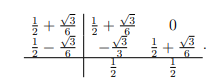
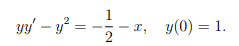

[18.550978538269526, 1.021337875909147, 0.009576035873340993, 9.606959520258584e-05, 9.61057767812079e-07, 2.5237456569016103e-10]


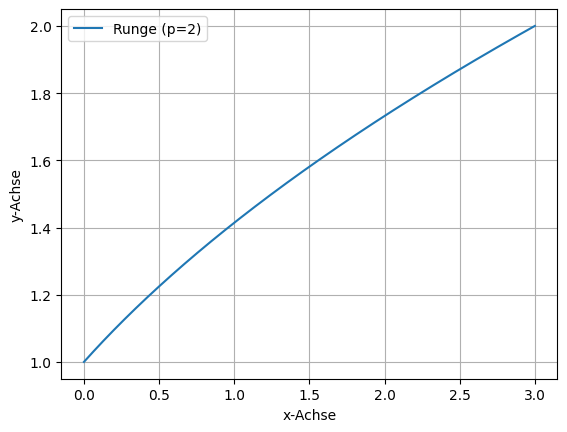

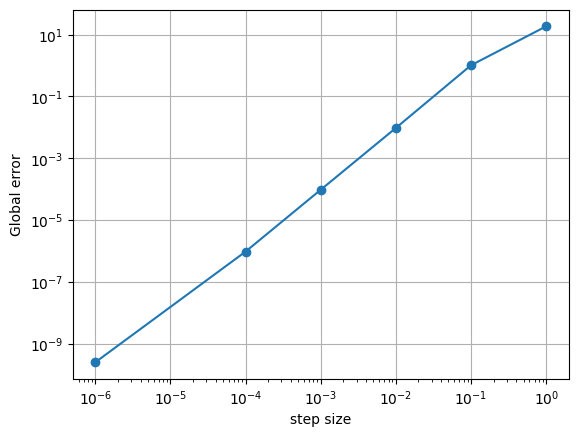

In [63]:








# Verfahren von Runge (RK2)
def runge_kutta_RK4(x0, X, N, f):
    h = (X-x0[0])/N
    N = N+1
    #print("EXP: Schrittweite: ", h)

    x = np.zeros((N))
    y = np.zeros((N))
    x[0] = x0[0]
    y[0] = x0[1]

    a11 =(0.5+np.sqrt(3)/6)
    a12 = 0
    a13 = 0
    a14 = 0

    a21 =-np.sqrt(3)/3
    a22 = 0.5+np.sqrt(3)/6
    a23 = 0
    a24 = 0

    a31 = 0
    a32 = 0
    a33 = 0
    a34 = 0

    a41 = 0
    a42 = 0
    a43 = 0
    a44 = 0

    c1 = 0.5+np.sqrt(3)/6
    c2 = 0.5-np.sqrt(3)/6
    c3 = 0
    c4 = 0

    b1 = 0.5
    b2 = 0.5
    b3 = 0
    b4 = 0

    k1 =0
    k2 =0
    k3 = 0
    k4 = 0

    

    for i in range(1, N):
        x[i] = x[i-1] + h
        k1 = f(x[i-1]+h*c1, y[i-1]+h*(a11*k1+a12*k2+a13*k3+a14*k4))
        k2 = f(x[i-1]+h*c2, y[i-1]+h*(a21*k1+a22*k2+a23*k3+a24*k4))
        k3 = f(x[i-1]+h*c3, y[i-1]+h*(a31*k1+a32*k2+a33*k3+a34*k4))
        k4 = f(x[i-1]+h*c4, y[i-1]+h*(a41*k1+a42*k2+a43*k3+a44*k4))
        
        y[i] = y[i-1] + h*((b1*k1 + b2*k2 + b3*k3 + b4*k4))

    return x, y


x0 = (0,1) # start of interval
X= 3.0 # end of interval
N = [3,30,300,3000,30000] # number of steps

y0 = 1.0 # initial value of y

def f(x,y): # differential equation y' = f(x,y)
    return y+(-0.5-x)/y 

def df(x,y): # derivative of f with respect to y (needed for implicit methods)
    return 1+(0.5+x)/(y**2)
global_errRK4 = []

j =0

# Calcualte global error of Runge-Kutta method
for i in N:
    h = (X -x0[0]) / i
    R_RK4_x, R_RK4_y = runge_kutta_RK4(x0, X, i, f)
    global_errRK4.append(abs(2-R_RK4_y[len(R_RK4_y)-1]))
    j+=1

    







print(global_errRK4)
plt.plot(R_RK4_x, R_RK4_y, '-', label='Runge (p=2)')
plt.ylabel('y-Achse')
plt.xlabel('x-Achse')
plt.legend()
plt.grid(True)
plt.show()

h =[]
j =0

for i in N:
    h.append((X-x0[0])/i)
    j+=1



# plot global error of Runge-Kutta method
plt.loglog(h ,global_errRK4,'o-')
plt.xlabel('step size')
plt.ylabel('Global error')
plt.grid(True)
plt.show()



